# Task 1: Coding the Central Dogma

## 1.1 Write a function that finds the complementary sequence of a given DNA sequence

In [1]:
def dna_complementary(seq,direction='same'):
    #first i set up a library of nucleotides where the key:value pairs are the complimentary nucleotides
    dnalib={'A':'T','T':'A','G':'C','C':'G'}
    #i then initialize an empty string that the new sequence will be appended to
    newseq=''
    try:
        if direction=='reverse':
            #I use [::-1] to reverse the order of the characters (nucleotides) in the original sequence
            seq=seq[::-1]
        #i iterate over each nucleotide in the original sequence
        for base in seq:
            #the complimentary nucleotide (value) corresponding to the current nucleotide (key) is appended to the 
            #empty string
            newseq+=dnalib[base.upper()]
        #after iterating through the entire sequence, the new complimentary sequence is returned
        return newseq
    #I add an exception that will trigger if a ValueError is raised (If the sequence contains non-canonical characters)
    except:
        raise ValueError('Sequence is non-canonical')
dna_complementary('atgc', direction="same")

'TACG'

## 1.2 Write a function that finds the RNA sequence of a given DNA sequence

In [2]:
def dna_rna(seq):
    try:
        #i iterate through the sequence
        for b in seq:
            #if there is a non-canonical nucleotide, i raise a key error
            if b not in ['A','T','G','C','U']:
                raise ValueError
                #if the nucleotide is a 'U', then i immediately return a statement that the sequence is RNA
            if b.upper()=='U':
                return print('Input sequence is a RNA sequence.','\n',seq)
        #i then turn the sequence into upper case
        seq1=seq.upper()
        #i then replace the 'T's in the sequence with 'U's
        seq2=seq1.replace('T','U')
        #I then return the RNA sequence
        return seq2
    #if a key error was raised above, the function will print this out
    except:
        raise ValueError('Sequence is non-canonical')
dna_rna("ATCG")

'AUCG'

## 1.3 Write a function that finds the amino acid sequence of a given RNA sequence

In [3]:
def rna_aa(seq):
    #Need to define a dictionary of triplet to amino acid mappings.
    AAs={'S': ['UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC'], 
     'L': ['UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG'], 
     'C': ['UGU', 'UGC'], 'W': ['UGG'], 'E': ['GAA', 'GAG'], 
     'D': ['GAU', 'GAC'], 'P': ['CCT', 'CCC', 'CCA', 'CCG'], 
     'V': ['GUU', 'GUC', 'GUA', 'GUG'], 'N': ['AAU', 'AAC'], 
     'M': ['AUG'], 'K': ['AAA', 'AAG'], 'Y': ['UAU', 'UAC'], 
     'I': ['AUU', 'AUC', 'AUA'], 'Q': ['CAA', 'CAG'], 'F': ['UUU', 'UUC'], 
     'R': ['CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'], 'T': ['ACU', 'ACC', 'ACA', 'ACG'], 
     '*': ['UAA', 'UAG', 'UGA'], 'A': ['GCU', 'GCC', 'GCA', 'GCG'], 
     'G': ['GGU', 'GGC', 'GGA', 'GGG'], 'H': ['CAU', 'CAC']}
    sequence=seq
    #i then initialize an empty string that I will append amino acids to
    AA=''
    #i iterate over the range of the length of the sequence, with a step of 3 to isolate the 3mer codons
    for i in range(0,len(sequence)-1,3):
        for k,v in AAs.items():
            #if the sequence is in a value of a key in the dictionary, its corresponding key will be added to 
            #the string of amino acids
            if sequence[i:i+3] in v:
                AA+=k
    return AA

## 1.4 Tying it all together: Write a higher-order function that combines 1.1-1.3.

In [4]:
def dna_aa(seq,direction='same'):
    #print(seq)
    #i call my complement function to create the complementary strand
    comp=dna_complementary(seq,direction)
    #print(comp)
    #i call the RNA to DNA function to convert the DNA sequence ot RNA
    RNA=dna_rna(comp)
    #print(RNA)
    #I then call the RNA to AA function to turn the RNA into its corresponding amino acis sequence
    protein=rna_aa(RNA)
    return protein
dna_aa("CGTCGCTACAAACCC", direction='same')

'AAMFG'

## 1.5 Protein annotator

In [5]:
import minotaor
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

# Replace the sequence with your own sequence
#i first define my sequence and make it uppercase
a= 'manlgcwmlvlfvatwsdlglckkrpkpggwntggsrypgqgspggnryppqggggwgqphgggwgqphgggwgqphgggwgqphgggwgqgggthsqwnkpskpktnmkhmagaaaagavvgglggyvlgsamsrpiihfgsdyedryyrenmhrypnqvyyrpmdeysnqnnfvhdcvnitikqhtvttttkgenftetdvkmmervveqmcitqyeresqayykrgssmvlfssppvillisfliflivg*'
protein=Seq(a.upper())
#I then add the annotations
protein_record = SeqRecord(protein, id="AAA59172", name='Human Prion',annotations={"molecule_type": "protein"})
protein_record = minotaor.annotate_record(protein_record)  # search is case sensitive

In [6]:
protein_record

SeqRecord(seq=Seq('MANLGCWMLVLFVATWSDLGLCKKRPKPGGWNTGGSRYPGQGSPGGNRYPPQGG...VG*'), id='AAA59172', name='Human Prion', description='<unknown description>', dbxrefs=[])

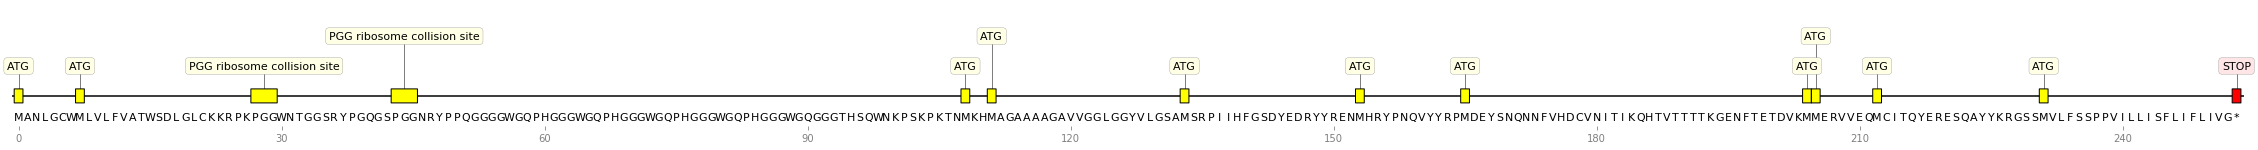

In [7]:
#I then plot the annotations
graphic_record = minotaor.MinotaorTranslator().translate_record(protein_record)
ax, _ = graphic_record.plot(figure_width=40, strand_in_label_threshold=7)
graphic_record.plot_sequence(ax)

The annotations provide 11 start codons (ATG) throughout the sequence, as well as two PGG ribosome collision sites. The entire 253 amino acid sequence of the prion is printed on the x axis. It points out two start codonds at the beginning of the sequence and no stop codon at the end.

# Task 2: Wrapping it all together with raw data

## 2.1 
Write a function that reads the fastq file and extracts all sequences that have a quality scores above Q10.

In [10]:
def extract_seqs(fasta_file_path):
    """Extracts sequences from a fasta file path if the quality of all bases is >= Q10"""
    #I first initialize a dictionary where IDs are keys and their corresponding sequences 
    #are values
    idseq={}
    #I then define a list the symbols of low quality scores 
    scores=['!','"','#','$','%','&',"'",'(',')','*']
    #I then open the file and set a count variable that will count which line the program is on,
    #since line 1 will be header, line 2 will be the sequence, and line 4 will be the quality score
    with open(fasta_file_path,'r') as fh:
        count=1
        for line in fh.readlines():
            #will only perform the following operations on lines that arent empty
            if line:
                #for each entry, i save the ID and sequence in a variable
                if count==1:
                    ID=line.strip()
                    #I isolate the first part of the header column to get the ID
                    ID=ID.rsplit(' ',1)[0][1:]
                if count==2:
                    seq=line.strip()
                if count==4:
                    c=0
                    #for the quality score lines, I iterate over the scores, adding 1 to a count variable if a
                    #low score is encountered
                    for s in line.strip():
                        if s in scores:
                            c+=1
                    #If there are no low scores, then the ID and sequence are added to the dictionary
                    if c==0:
                        idseq[ID]=seq
                        c=0
                        count=0
                    #If there are low scores, then the ID and sequence are not saved and I move on to the next entry
                    else:
                        c=0
                        count=0
                count+=1
        #I then close the file and return the ID:seq dictionary        
        fh.close()
    return idseq
sequence_dict=extract_seqs('sample10000.fastq')
#prints out first 10 entries
print({k: sequence_dict[k] for k in list(sequence_dict)[:10]})

{'ERR016162.31734339': 'AAGAATTTTTAAATTTCCATCTTGATTTCATTGTTGACCCCAAAATTATTCAGGAGTAGGTTATTTATTTTCCATGTATTTTCATGATTTTG', 'ERR016162.11626500': 'GAATTATCGAATGGAATCGAAGAGAATCATCGAATGGACCCGAATGGAATCATCTAATGGAATGGAATGGAATAATCCATGGACTCGAATGC', 'ERR016162.22472995': 'TTTATTTTTTAAATTATAATTTAAGTTCTAGGGCACATGTGCACAACGTGCAGGTTTGTTACATATGTATATATGTGCCATGTTGGTGTGCT', 'ERR016162.15992012': 'CAAATGATACAGAAACCTTATGGAACCTGTAAGGTTAAATCATGCATTTCTGAAAGTAGTAATAATATTTACTTTACTTCCAGTGGGTTAAT', 'ERR016162.21114782': 'TTCCAGTAAGGGTACCAAGACAATCTAATGGAGAAAGAATACTCTTTTCATCCCATGGTGTGGGACAAATAGAAATAGACATGCAAAGAAAA', 'ERR016162.19132565': 'ATAAATATGGTACACCTAGTATGTCTAGTCAAAGACTCCTAACAAGGCAGAATGTGAACTTACAGTAAAGGCTTTCCAAGATGAGGAAACCA', 'ERR016162.31848060': 'TTTTGGACACCGTGAACCAGCACCGGGCTGTGTCAGCCCAGCTCGAGGGGCCAGGGCAGAGGCAGGGTTCACGGAGACGCAGATTCTGCCAC', 'ERR016162.34741020': 'AAAGTGAAAGTGCTGTCTATTTGATGCCAATTTATCATTTTAACTGCTTGCATTTTGCAACATGTAAACGACAGTAGCTGGTTTTCTATTGC', 'ERR016162.27825684': 'GGTGTGTCCTGGGGGCTCCACCTTGAGATCAG

In [34]:
import minotaor
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
class Genome:
    """
    Read, store, and analyze the contents of a genome from a FASTQ file
    """
    #I first define all of the class variables where the results of each function will be stored in order
    #to use in other functions
    def __init__(self, filepath):
        self.filepath = filepath
        self.dna_seqs = None
        self.dna_complementary_seqs = None
        self.rna_seqs = None
        self.aa_seqs = None
    
    def extract_seqs(self):
         #I use the extract_seqs function from above on the given filepath 
        self.dna_seqs=extract_seqs(self.filepath)
        return self.dna_seqs
    
    def complementary_seqs(self,direction='same'):
        #If the output if the previous function is 'None', then a ValueError is raised
        if self.dna_seqs==None:
            raise ValueError("FASTQ file not read in properly")
         #first i set up a library of nucleotides where the key:value pairs are the complimentary nucleotides
        self.dna_complementary_seqs={}
        #I then iterate through the IDs and sequences in the dictionary
        for i,dna in self.dna_seqs.items():
            #i then use the dna_complementary function described above to produce a complementary strand, which is then 
            #added to a new dictionary along with its ID
            new=dna_complementary(dna,direction)
            self.dna_complementary_seqs[i]=new
        print('complement done')
        #I return the new dictionary
        return self.dna_complementary_seqs
    
    def rna_seq(self):
        #If the output if the previous function is 'None', then a ValueError is raised
        if self.dna_complementary_seqs==None:
            raise ValueError('Complement not computed')
        #I define a new dictionary where the IDs are keys and the corresponding RNA sequences are values
        self.rna_seqs={}
        #I then iterate through the complement dictionary
        for i,dna in self.dna_complementary_seqs.items():
            #I perform the dna_rna function as described above to each complementary sequence and add it
            #along with its ID to a new dictionary
            n=dna_rna(dna)
            self.rna_seqs[i]=n
        print('rna done')
        #i then return the RNA dictionary
        return self.rna_seqs
    
    def aa_seq(self):
        #If the output if the previous function is 'None', then a ValueError is raised
        if self.rna_seqs==None:
            raise ValueError('DNA to RNA not computed')
        #I then initialize a dictionary with IDs as keys and the amino acid sequences as values
        self.aa_seqs={}
        #I then iterate through the RNA dictionary
        for i,rna in self.rna_seqs.items():
            #I apply the rna_aa function from above to each RNA sequence and add it
            #along with its ID to a new dictionary
            ne=rna_aa(rna)
            self.aa_seqs[i]=ne
        print('aa done')
        #I then return the amino acid dictionary
        return self.aa_seqs
    
    #I then create a function that annotates the protein sequence for a given ID
    def annot_aa_plot(self, seqid):
        if self.aa_seqs==None:
            raise ValueError('RNA to AA not computed')
        #i first iterate through the items in my protein sequence dictionary
        for aa,sq in self.aa_seqs.items():
            #If the ID matches the input seqid, then annotations are performed on the corresponding sequence
            if aa==seqid:
                pa=Seq(sq)
                pr=SeqRecord(pa, id=aa, 
                             annotations={"molecule_type": "protein"})
                pr=minotaor.annotate_record(pr)
                gr=minotaor.MinotaorTranslator().translate_record(pr)
                ax,_= gr.plot(figure_width=10, strand_in_label_threshold=7)
                #I then plot the sequence and annotation
                gr.plot_sequence(ax)
        print('annotation done')
        print('Annotation for Sequence ID: ')
        return seqid         

complement done
rna done
aa done
annotation done
Annotation for Sequence ID: 
ERR016162.32623019


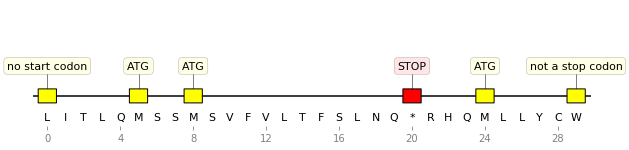

In [39]:
genes=Genome('sample10000.fastq')
genes.extract_seqs()
genes.complementary_seqs('same')
genes.rna_seq()
genes.aa_seq()
print(genes.annot_aa_plot("ERR016162.32623019"))